In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Read in the california housing data set
california_data = pd.read_csv('../Resources/California_Housing.csv')
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


In [3]:
# Get the information on the DataFrame

california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      3000 non-null   float64
 1   HouseAge    3000 non-null   float64
 2   AveRooms    3000 non-null   float64
 3   AveBedrms   3000 non-null   float64
 4   Population  3000 non-null   float64
 5   AveOccup    3000 non-null   float64
 6   Latitude    3000 non-null   float64
 7   Longitude   3000 non-null   float64
dtypes: float64(8)
memory usage: 187.6 KB


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

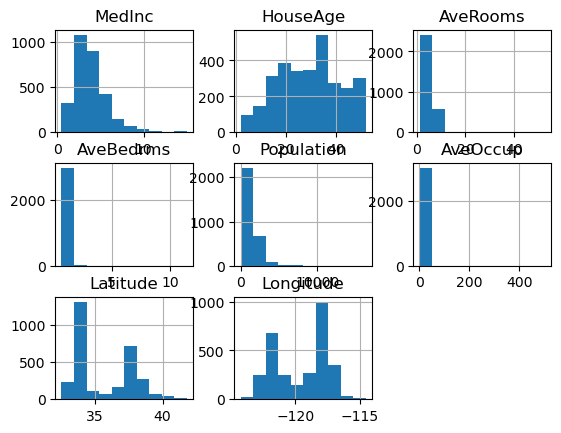

In [4]:
# self reminder basic panda function
california_data.hist()

array([[<Axes: title={'center': 'Population'}>]], dtype=object)

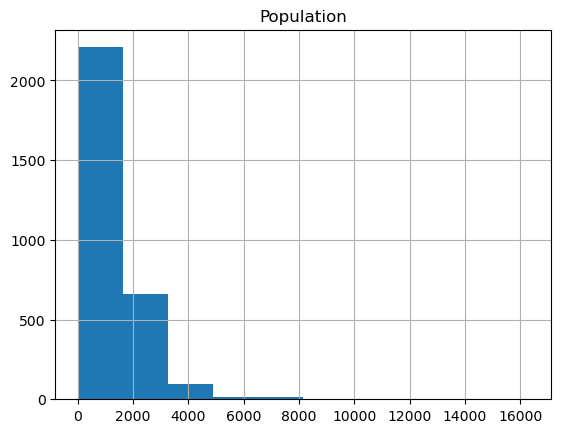

In [5]:
# self reminder basic panda function
california_data.hist(column="Population")

<function matplotlib.pyplot.show(close=None, block=None)>

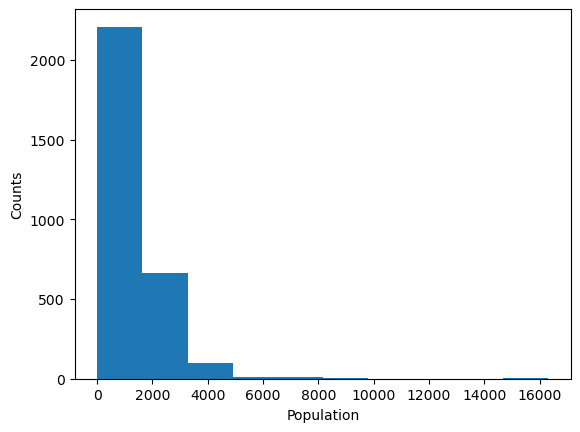

In [7]:
# Determine which measure of central tendency is most appropriate to describe the Population

plt.hist(california_data["Population"])
plt.xlabel("Population")
plt.ylabel("Counts")
plt.show


NormaltestResult(statistic=1.313891367835878, pvalue=0.5184323751044501)
NormaltestResult(statistic=2.3760437656016404, pvalue=0.3048236449751045)
NormaltestResult(statistic=0.8891682622245285, pvalue=0.6410908303332052)
--------------------------
NormaltestResult(statistic=12.75558133700995, pvalue=0.0016988721852786892)
NormaltestResult(statistic=7.8213133161297055, pvalue=0.020027345624822748)
NormaltestResult(statistic=1.573548411532693, pvalue=0.4553111690444047)
--------------------------
NormaltestResult(statistic=41.101333262613124, pvalue=1.1883897097288039e-09)
--------------------------
NormaltestResult(statistic=101.96940304452556, pvalue=7.204858690792712e-23)


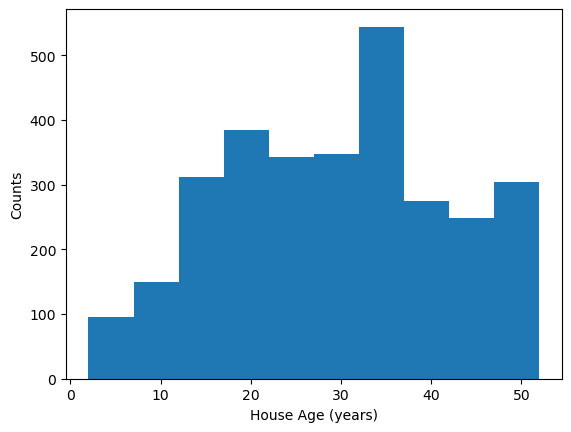

In [9]:
# Determine if the house age in California is normally distributed using a small and large sample size. 

plt.hist(california_data["HouseAge"])
plt.xlabel("House Age (years)")
plt.ylabel("Counts")
plt.show

print(st.normaltest(california_data["HouseAge"].sample(50)))
print(st.normaltest(california_data["HouseAge"].sample(50)))
print(st.normaltest(california_data["HouseAge"].sample(50)))
print("--------------------------")
print(st.normaltest(california_data["HouseAge"].sample(100)))
print(st.normaltest(california_data["HouseAge"].sample(100)))
print(st.normaltest(california_data["HouseAge"].sample(100)))
print("--------------------------")
print(st.normaltest(california_data["HouseAge"].sample(500)))
print("--------------------------")
print(st.normaltest(california_data["HouseAge"].sample(1000)))

In [13]:
# quartiles = temperatures.quantile([0.25,0.5,0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq - lowerq
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = lowerq + (1.5*iqr)

# Determine if there are any potential outliers in the average occupancy in California
quartiles = california_data["AveOccup"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr

import numpy as np
median_num = np.median(california_data["AveOccup"])

print(f"lower q is: {lowerq}")
print(f"upper q is: {upperq}")
print(f"iqr is: {iqr}")
print(f"median is: {median_num}")
print(f"values below {lower_bound} could be outliers")
print(f"values above {upper_bound} could be outliers")



lower q is: 2.4250909806040477
upper q is: 3.297459274342836
iqr is: 0.8723682937387882
median is: 2.81970199317512
values below 1.1165385399958654 could be outliers
values above 4.606011714951018 could be outliers


In [15]:
outlier_occupancy = california_data.loc[(california_data["AveOccup"]< lower_bound) | (california_data["AveOccup"]> upper_bound)]

outlier_occupancy

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
...,...,...,...,...,...,...,...,...
2793,2.5556,11.0,5.825112,1.255605,1158.0,5.192825,34.96,-120.45
2849,9.8892,40.0,8.244019,0.995215,976.0,4.669856,37.46,-122.20
2907,4.8750,5.0,7.101721,1.176056,7694.0,6.020344,34.69,-118.20
2919,1.6150,42.0,4.824000,1.216000,1167.0,4.668000,33.96,-118.28


In [7]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?


The minimum median income of the potential outliers is 0.716
The maximum median income of the potential outliers is 15.0001


In [14]:
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


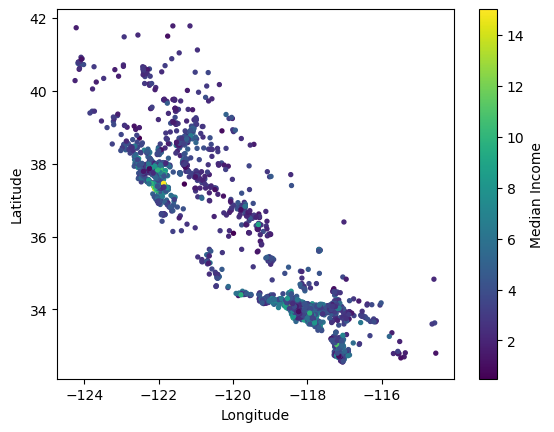

In [33]:
# color map is viridis: https://matplotlib.org/stable/tutorials/colors/colormaps.html

x_axis = california_data["Longitude"]
y_axis = california_data["Latitude"]
colors = california_data["MedInc"]

plt.scatter(x_axis, y_axis, marker='o', c=colors, cmap="viridis", s=8)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.colorbar(label="Median Income")

plt.show()

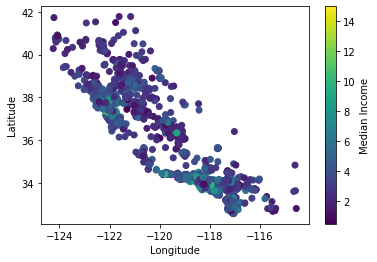

In [8]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.


